In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Taking Data & Separating those with (;)

In [2]:
df=pd.read_csv("cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.isnull().values.any()
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Wathing value for some particular column

In [4]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

# Wathing value By Graph for some particular column

C:\Users\sowad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

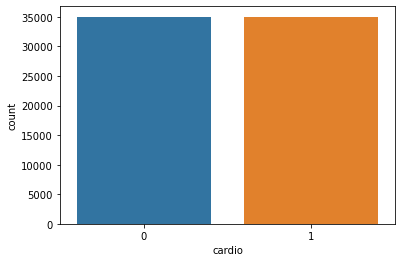

In [5]:
seaborn.countplot(df['cardio'])

<AxesSubplot:xlabel='gender', ylabel='count'>

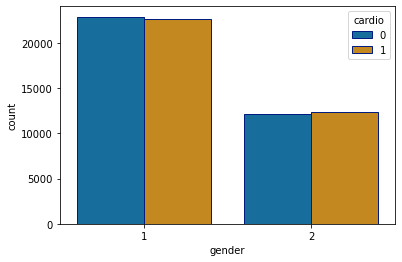

In [6]:
seaborn.countplot(x='gender',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

#  Here a problem here about the age because of value in (day/365)

In [17]:
# seaborn.countplot(x='gender',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [7]:
df['year']=(df['age']/365).round(0) #.round(0) we use it for making it without fractional value

In [8]:
year

NameError: name 'year' is not defined

<AxesSubplot:xlabel='year', ylabel='count'>

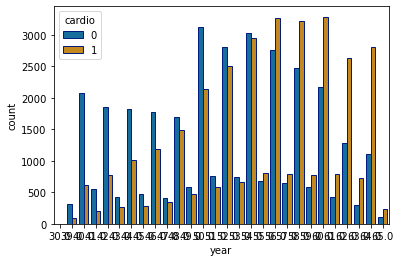

In [9]:
 seaborn.countplot(x='year',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

# Show the value in descirbed

In [10]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


#  See Co-relation between all the Data

In [11]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


# Making data For Train

In [12]:
#df.drop(['age'],axis=1)

In [114]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [13]:
#merge=pd.concat([df,year],axis='columns')
#x=merge.drop(['gender',id],axis=1).iloc[:,:-1]
df=df.drop(['year','id'],axis=1)
df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
x=df.iloc[:,:-1]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [28]:
y=df.iloc[:,11]
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# Feature Selection Technique======================


# Universal Selection 

In [29]:
from sklearn.feature_selection import SelectKBest # here K is the number of columns(feature)

In [30]:
from sklearn.feature_selection import f_classif

In [44]:
skb=SelectKBest(score_func=f_classif)

In [45]:
skb.fit(x,y)

SelectKBest()

In [48]:
score_col=pd.DataFrame(skb.scores_,columns=['score_value'])

In [49]:
score_col

,score_value
0,4209.007957
1,4.603641
2,8.197397
3,2388.777887
4,208.339524
5,303.629011
6,3599.361137
7,562.772977
8,16.790541
9,3.761355


In [56]:
name_col=pd.DataFrame(x.columns,columns=['name'])

In [57]:
top_feature=pd.concat([score_col,name_col], axis=1) # concat name and new feature columns

In [58]:
top_feature

,score_value,name
0,4209.007957,age
1,4.603641,gender
2,8.197397,height
3,2388.777887,weight
4,208.339524,ap_hi
5,303.629011,ap_lo
6,3599.361137,cholesterol
7,562.772977,gluc
8,16.790541,smoke
9,3.761355,alco


#                 viewing top features basis to score

In [63]:
top_feature.nlargest(8,"score_value")

,score_value,name
0,4209.007957,age
6,3599.361137,cholesterol
3,2388.777887,weight
7,562.772977,gluc
5,303.629011,ap_lo
4,208.339524,ap_hi
10,89.091494,active
8,16.790541,smoke


# Features Important===============en-sembol technique

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
etc=ExtraTreesClassifier()

In [66]:
etc.fit(x,y)

ExtraTreesClassifier()

In [67]:
etc.feature_importances_

array([0.2882416 , 0.00582997, 0.17028517, 0.1793251 , 0.17924802,
       0.10795245, 0.04459156, 0.01118096, 0.00401126, 0.00434622,
       0.00498769])

In [68]:
top=pd.Series(etc.feature_importances_,index=x.columns)
top

age            0.288242
gender         0.005830
height         0.170285
weight         0.179325
ap_hi          0.179248
ap_lo          0.107952
cholesterol    0.044592
gluc           0.011181
smoke          0.004011
alco           0.004346
active         0.004988
dtype: float64

In [ ]:
top.nlargest(8)

<AxesSubplot:>

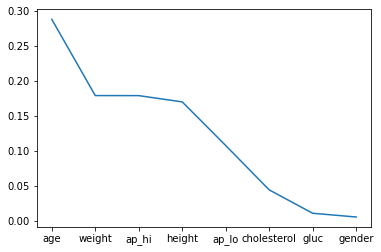

In [70]:
top.nlargest(8).plot()

<AxesSubplot:>

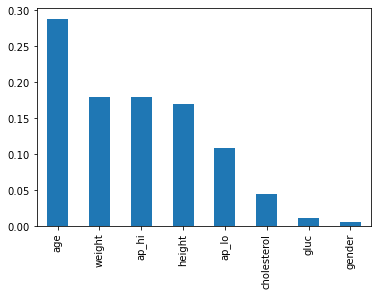

In [72]:
top.nlargest(8).plot(kind='bar')

# Making the bar horigental wise

<AxesSubplot:>

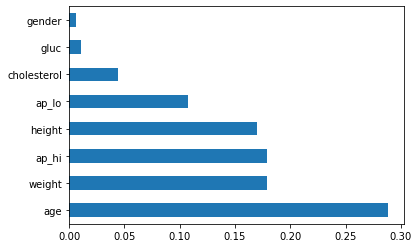

In [73]:
top.nlargest(8).plot(kind='barh')

# viewing kind of visual option

<AxesSubplot:ylabel='Frequency'>

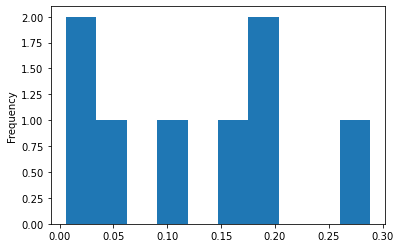

In [76]:
top.nlargest(8).plot(kind='hist')

<AxesSubplot:>

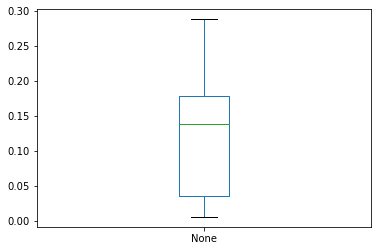

In [77]:
top.nlargest(8).plot(kind='box')

C:\Users\sowad\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='None'>

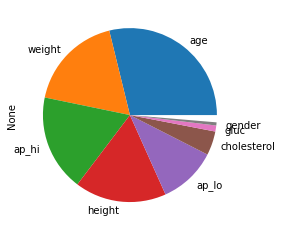

In [78]:
top.nlargest(8).plot(kind='pie')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [24]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
13802,19601,1,153,62.0,170,120,2,1,0,0,0
41012,22102,2,170,74.0,120,80,1,1,0,0,1
2262,15285,1,152,40.0,110,60,1,1,0,0,1
58404,21262,1,177,74.0,120,60,1,1,0,0,1
40786,15340,1,167,84.0,120,70,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17904,14514,1,152,68.0,120,80,1,1,0,0,1
37597,20601,2,162,63.0,130,82,2,1,0,0,1
10201,20394,2,180,79.0,120,80,1,1,0,0,1
9372,17514,2,167,65.0,140,90,1,1,0,0,1


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000) # with n_estimatiors=(500)tree number
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)


0.7188095238095238

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.6368571428571429

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.6055238095238096